In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [4]:
#show null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Analysis

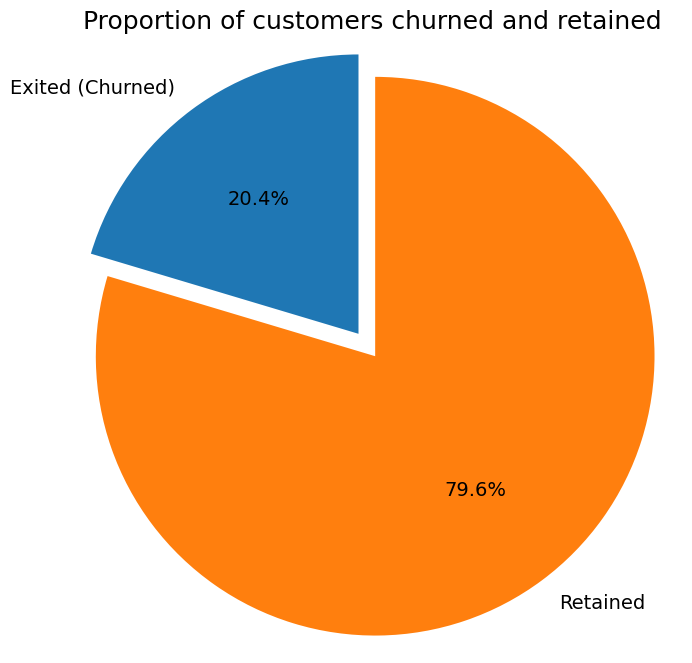

In [9]:
# Count the number of customers who churned and were retained
churned_count = df[df['Exited'] == 1]['Exited'].count()
retained_count = df[df['Exited'] == 0]['Exited'].count()

# Create labels and sizes lists for the pie chart
labels = ['Exited (Churned)', 'Retained']
sizes = [churned_count, retained_count]

# Create the pie chart with some customization
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes,
       labels=labels,
       autopct='%1.1f%%',
       startangle=90,
       textprops={'fontsize': 14},
       explode=[0.1, 0])

# Add a title and adjust the axis to make it equal
plt.title('Proportion of customers churned and retained', size=18)
ax.axis('equal')

# Display the pie chart
plt.show()

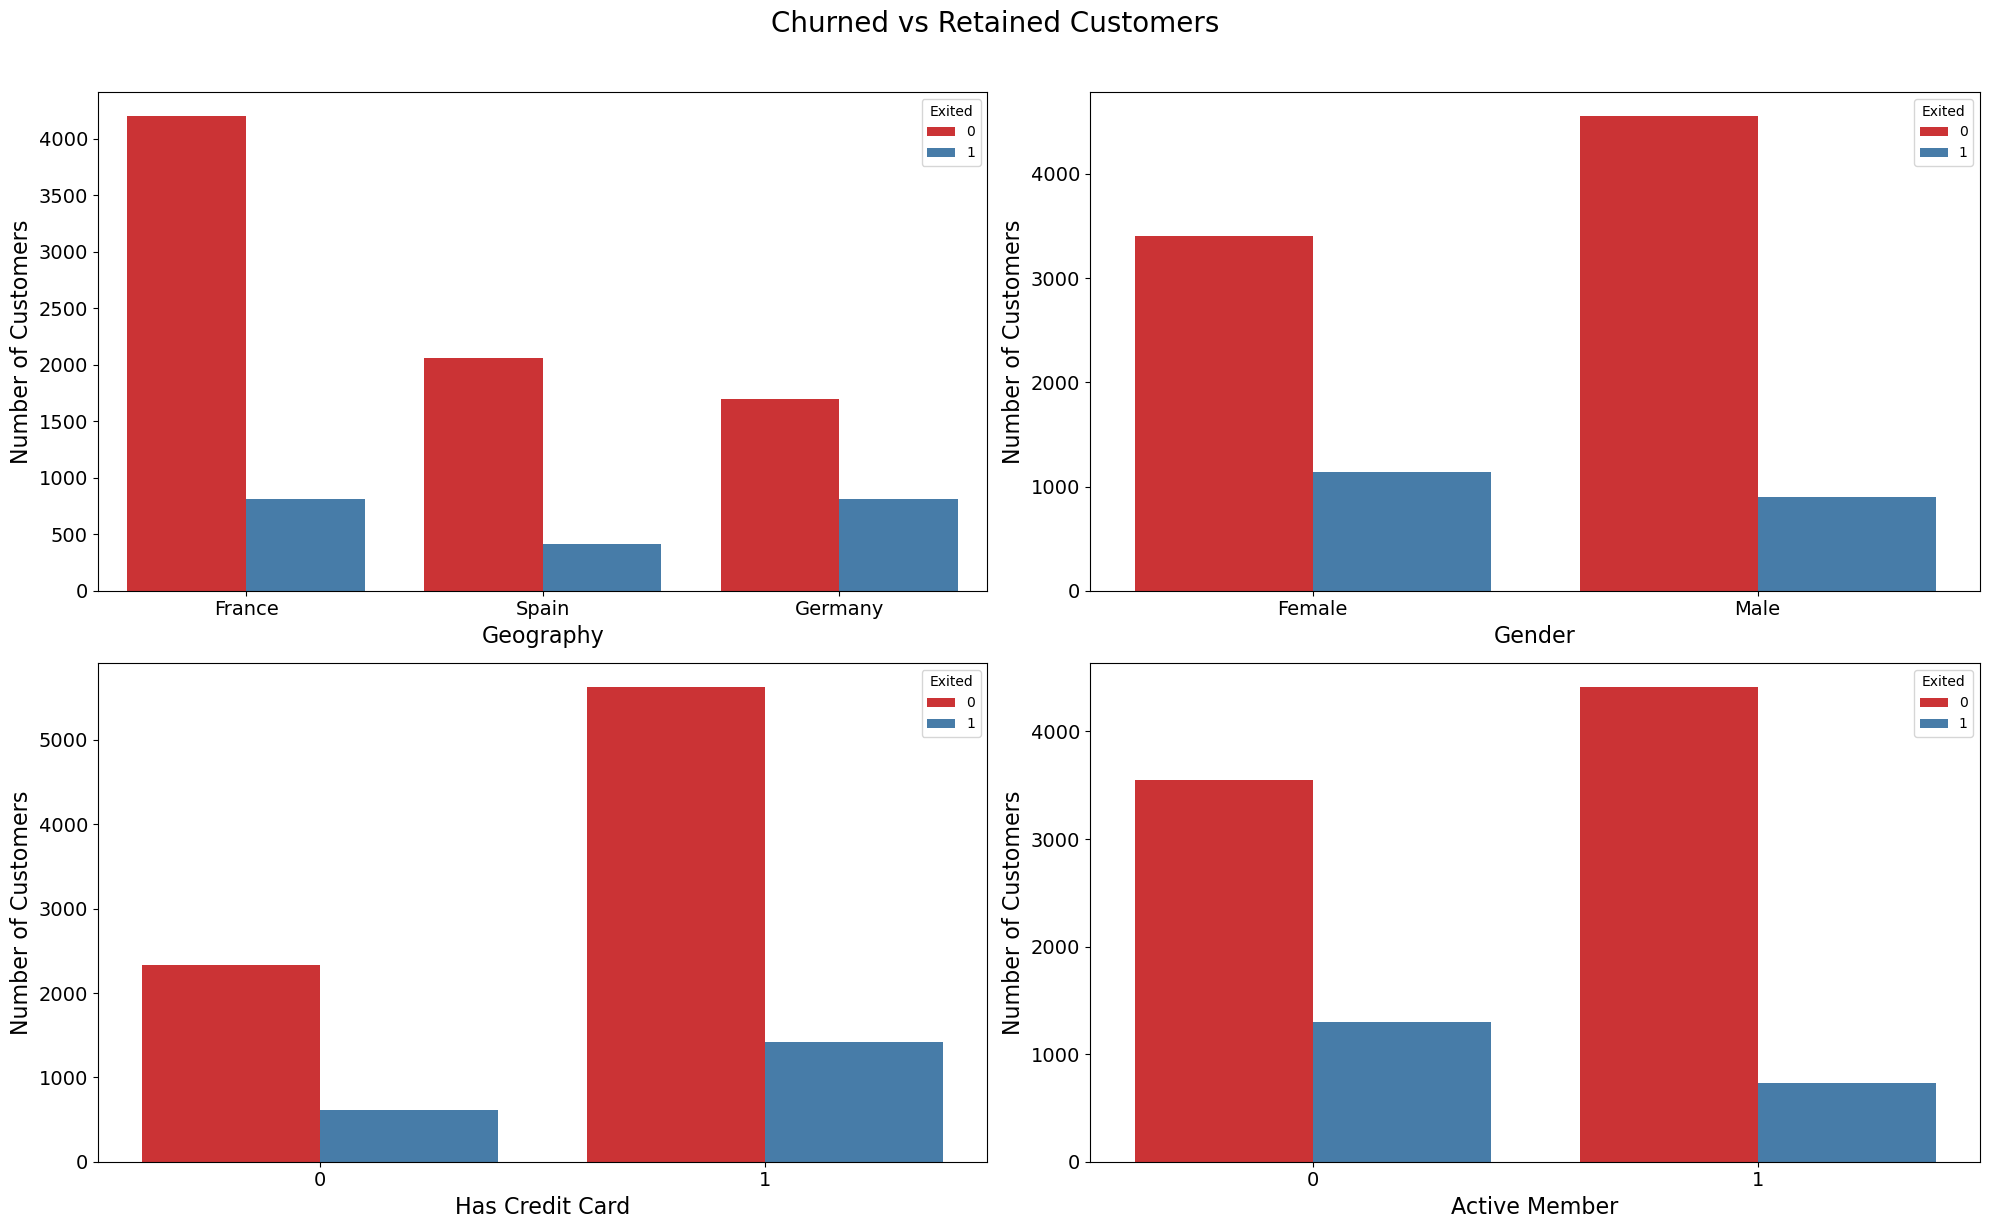

In [10]:
fig, axarr = plt.subplots(2,2, figsize=(20,12))
palette = 'Set1'

sns.countplot(x='Geography', hue='Exited', data=df, palette=palette, ax=axarr[0][0])
axarr[0][0].set_xlabel('Geography', fontsize=16)
axarr[0][0].set_ylabel('Number of Customers', fontsize=16)
axarr[0][0].tick_params(labelsize=14)

sns.countplot(x='Gender', hue='Exited', data=df, palette=palette, ax=axarr[0][1])
axarr[0][1].set_xlabel('Gender', fontsize=16)
axarr[0][1].set_ylabel('Number of Customers', fontsize=16)
axarr[0][1].tick_params(labelsize=14)

sns.countplot(x='HasCrCard', hue='Exited', data=df, palette=palette, ax=axarr[1][0])
axarr[1][0].set_xlabel('Has Credit Card', fontsize=16)
axarr[1][0].set_ylabel('Number of Customers', fontsize=16)
axarr[1][0].tick_params(labelsize=14)

sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette=palette, ax=axarr[1][1])
axarr[1][1].set_xlabel('Active Member', fontsize=16)
axarr[1][1].set_ylabel('Number of Customers', fontsize=16)
axarr[1][1].tick_params(labelsize=14)

plt.suptitle('Churned vs Retained Customers', fontsize=20, y=1.02)

plt.tight_layout()
plt.show()

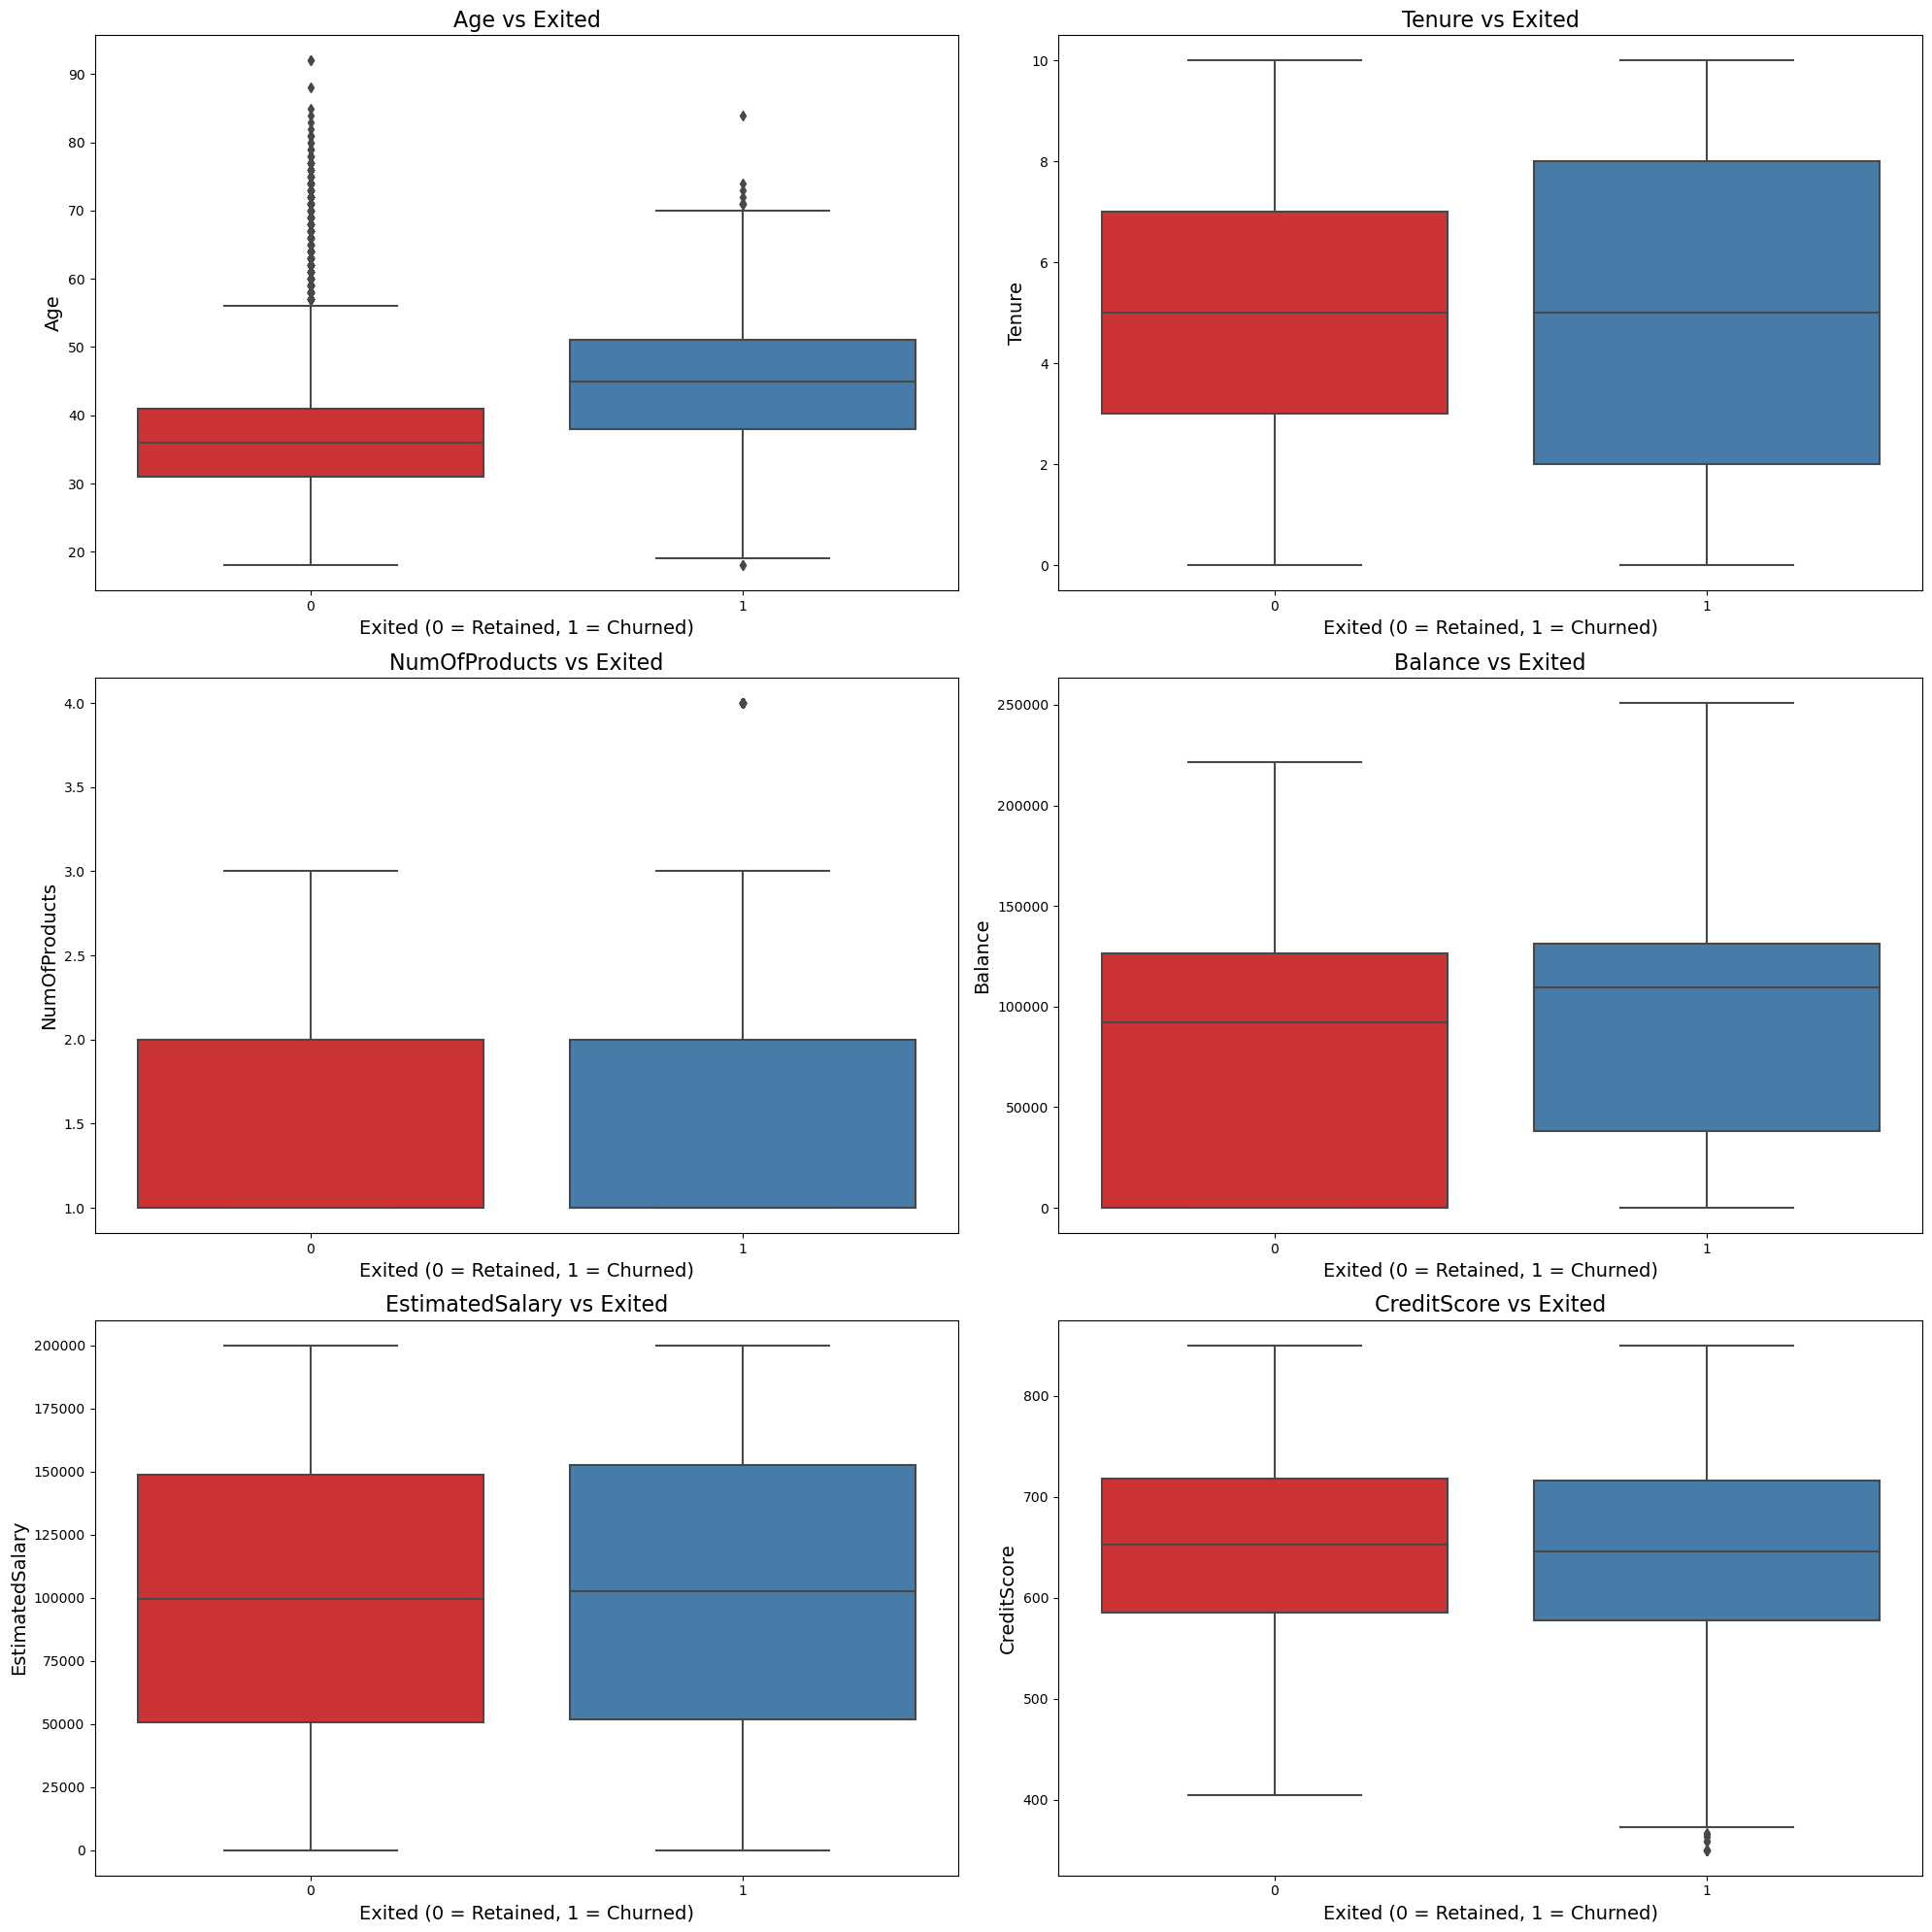

In [11]:
fig, axarr = plt.subplots(3,2, figsize=(20,20))

sns.boxplot(y=df['Age'], x=df['Exited'], ax=axarr[0][0], palette='Set1')
axarr[0][0].set_title('Age vs Exited', size=16)
axarr[0][0].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[0][0].set_ylabel('Age', size=14)

sns.boxplot(y=df['Tenure'], x=df['Exited'], ax=axarr[0][1], palette='Set1')
axarr[0][1].set_title('Tenure vs Exited', size=16)
axarr[0][1].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[0][1].set_ylabel('Tenure', size=14)

sns.boxplot(y=df['NumOfProducts'], x=df['Exited'], ax=axarr[1][0], palette='Set1')
axarr[1][0].set_title('NumOfProducts vs Exited', size=16)
axarr[1][0].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[1][0].set_ylabel('NumOfProducts', size=14)

sns.boxplot(y=df['Balance'], x=df['Exited'], ax=axarr[1][1], palette='Set1')
axarr[1][1].set_title('Balance vs Exited', size=16)
axarr[1][1].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[1][1].set_ylabel('Balance', size=14)

sns.boxplot(y=df['EstimatedSalary'], x=df['Exited'], ax=axarr[2][0], palette='Set1')
axarr[2][0].set_title('EstimatedSalary vs Exited', size=16)
axarr[2][0].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[2][0].set_ylabel('EstimatedSalary', size=14)

sns.boxplot(y=df['CreditScore'], x=df['Exited'], ax=axarr[2][1], palette='Set1')
axarr[2][1].set_title('CreditScore vs Exited', size=16)
axarr[2][1].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[2][1].set_ylabel('CreditScore', size=14)

plt.tight_layout()
plt.show()

In [12]:
def print_categorical_val(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f"{column}: {df[column].unique()}")

In [13]:
print_categorical_val(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [14]:
df1 = pd.get_dummies(data=df, columns=['Geography','Gender'])
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [15]:
df1['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
scaling_var = ['Tenure', 'CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
df1[scaling_var] = scaler.fit_transform(df1[scaling_var])

In [17]:
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,True,False,False,True,False
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,False,True,True,False
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,True,False,False,True,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,True,False,False,True,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,0,True,False,False,False,True
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,0,True,False,False,False,True
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,1,True,False,False,True,False
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,1,False,True,False,False,True


In [18]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [20]:
len(x_train.columns)

13

In [51]:
x_train.shape

(8000, 13)

In [53]:
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [85]:
x_train,y_train

(      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
 7751     1.029206  0.007457  0.341352 -1.225848       0.807737        0.0   
 4154     0.780884 -0.469311 -0.695982 -1.225848       0.807737        1.0   
 3881    -0.646971  2.391296 -0.695982 -1.225848      -0.911583        1.0   
 9238     1.267182  1.056346 -0.350204 -1.225848       0.807737        1.0   
 5210    -1.029802 -0.373958  0.687130  0.853146       0.807737        0.0   
 ...           ...       ...       ...       ...            ...        ...   
 3046     0.077303 -0.755372 -0.695982  0.905806      -0.911583        0.0   
 9917    -0.160673  1.342407  1.032908  0.649413      -0.911583        0.0   
 4079    -0.698705 -0.755372 -0.350204  1.322123      -0.911583        1.0   
 2254     0.294585 -0.278604  0.341352  1.141895      -0.911583        0.0   
 2915    -1.671302  1.247053 -1.387538  0.880780      -0.911583        1.0   
 
       IsActiveMember  EstimatedSalary  Geography_France  Geog

In [86]:
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)

# Model Training

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
lgc = LogisticRegression()
lgc.fit(x_train,y_train)

LogisticRegression()

In [56]:
lgc.score(x_train,y_train)

0.8125

In [57]:
logistic_egression_score=lgc.score(x_test,y_test)
logistic_egression_score

0.809

In [58]:
y_pred = lgc.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [59]:
#model evaluation,confusion matrix and classification report
from sklearn.metrics import confusion_matrix ,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1538   57]
 [ 325   80]]


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.20      0.30       405

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



# KNN Algorithm

In [61]:
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=5)
cls.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
cls.score(x_train,y_train)

0.882125

In [63]:
knn_score=cls.score(x_test,y_test)
knn_score

0.8275

In [64]:
y_pred = cls.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [65]:
#model evaluation,confusion matrix and classification report
from sklearn.metrics import confusion_matrix ,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1491  104]
 [ 241  164]]


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1595
           1       0.61      0.40      0.49       405

    accuracy                           0.83      2000
   macro avg       0.74      0.67      0.69      2000
weighted avg       0.81      0.83      0.81      2000



# SVM

In [68]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf', random_state=42)
svm.fit(x_train,y_train)

SVC(random_state=42)

In [69]:
svm.score(x_train,y_train)

0.870125

In [70]:
svm.score(x_test,y_test)

0.851

In [71]:
y_pred = svm.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [72]:
#model evaluation,confusion matrix and classification report
from sklearn.metrics import confusion_matrix ,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1547   48]
 [ 250  155]]


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.76      0.38      0.51       405

    accuracy                           0.85      2000
   macro avg       0.81      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000



# Artificial Neural Network


In [74]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense

In [97]:
model  = Sequential()
model.add(Dense(11,activation = 'relu',input_dim = 13)) 
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [98]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                154       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 298
Trainable params: 298
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam' , metrics = ['accuracy'])

In [115]:
history = model.fit(x_train, y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8705 - val_loss: 0.3203 - val_accuracy: 0.8769
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3215 - accuracy: 0.8694 - val_loss: 0.3188 - val_accuracy: 0.8756
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3204 - accuracy: 0.8686 - val_loss: 0.3149 - val_accuracy: 0.8838
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3211 - accuracy: 0.8684 - val_loss: 0.3169 - val_accuracy: 0.8800
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3207 - accuracy: 0.8677 - val_loss: 0.3170 - val_accuracy: 0.8769
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8677 - val_loss: 0.3180 - val_accuracy: 0.8769
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8689 - val_loss: 0.3181 - val_accuracy: 0.8756

In [116]:
model.layers[0].get_weights()

[array([[-0.29897973, -0.01417555, -0.56681347, -0.39169556,  0.12955908,
          0.05101562, -0.28096136, -0.1921382 , -0.03985743,  0.26861906,
          0.16616774],
        [-0.20045148,  0.8878862 ,  0.22305705, -0.49590135,  0.5901826 ,
         -0.8100325 , -0.63276875, -0.9825874 ,  0.3357842 ,  0.15925865,
         -0.06810085],
        [-0.5380503 ,  0.02694663, -0.74374056, -0.05624617,  0.36057693,
          0.02759589, -0.10986506,  0.5866798 ,  0.08034513,  0.63646364,
         -0.26581696],
        [-0.5567818 , -0.09355664, -0.2905555 , -0.3589853 , -0.2737748 ,
         -0.056807  , -0.15179767, -0.23955908,  0.41913167,  0.10245402,
         -0.3332345 ],
        [ 0.20692945,  0.03062963, -0.58563143,  0.1892997 , -1.0459125 ,
          0.02916175,  0.47617573,  0.31301042,  1.0000205 ,  0.5649203 ,
          1.237916  ],
        [-0.33568192, -0.04281874,  0.72454894,  0.18854406, -0.08707109,
          0.12784147, -0.52089244, -0.13864088, -0.20252648,  0.1618469

In [117]:
model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


array([[0.01795688],
       [0.05020506],
       [0.09086749],
       ...,
       [0.02313968],
       [0.0069659 ],
       [0.05871568]], dtype=float32)

In [118]:
y_log=model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [119]:
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [120]:
#model evaluation,confusion matrix and classification report
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report


In [121]:
accuracy_score(y_test,y_pred)

0.843

In [122]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1498   97]
 [ 217  188]]


In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      1595
         1.0       0.66      0.46      0.54       405

    accuracy                           0.84      2000
   macro avg       0.77      0.70      0.73      2000
weighted avg       0.83      0.84      0.83      2000



In [124]:
history.history

{'loss': [0.32105380296707153,
  0.3214632272720337,
  0.3203756809234619,
  0.32111069560050964,
  0.3206772208213806,
  0.3211386799812317,
  0.3215550482273102,
  0.32005634903907776,
  0.3200863301753998,
  0.32097914814949036,
  0.32022544741630554,
  0.3207288086414337,
  0.32025134563446045,
  0.3200165927410126,
  0.32037654519081116,
  0.3204638659954071,
  0.31979691982269287,
  0.3204459249973297,
  0.3197185695171356,
  0.3194904625415802,
  0.3201722204685211,
  0.3194275498390198,
  0.3194662928581238,
  0.3195793628692627,
  0.31938087940216064,
  0.3196542263031006,
  0.31948503851890564,
  0.31839707493782043,
  0.3190191984176636,
  0.31892457604408264,
  0.31903478503227234,
  0.3186456859111786,
  0.3185017704963684,
  0.31856128573417664,
  0.3183887004852295,
  0.3187640309333801,
  0.3185197710990906,
  0.3179909884929657,
  0.31910279393196106,
  0.31847745180130005,
  0.317955881357193,
  0.31828761100769043,
  0.31772130727767944,
  0.31825244426727295,
  0.31

In [125]:
import matplotlib.pyplot as plt

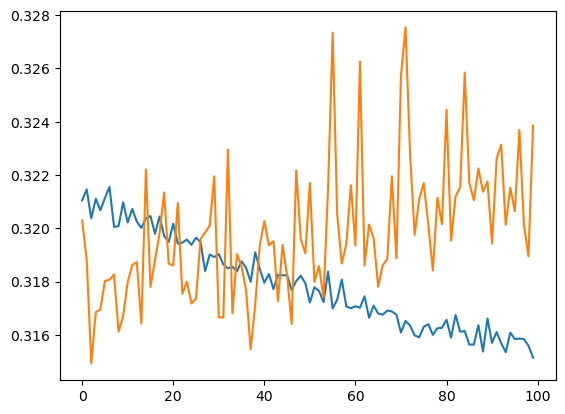

In [127]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

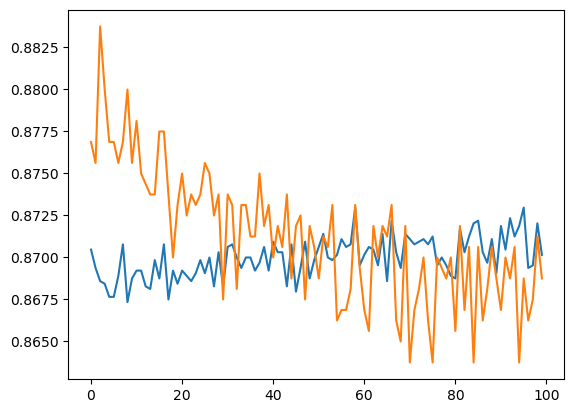

In [128]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

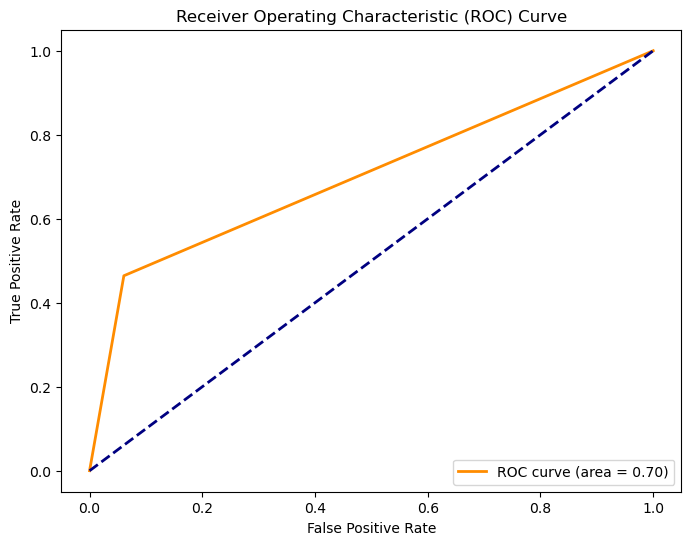

In [129]:

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [130]:
print("AUC: {:.2f}".format(roc_auc))

AUC: 0.70


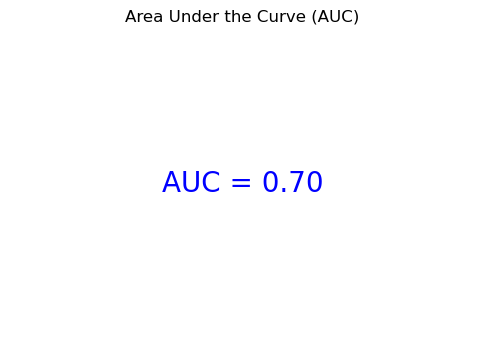

AUC: 0.70


In [131]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)

# Plot AUC value
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, 'AUC = {:.2f}'.format(roc_auc),
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20, color='b')
plt.axis('off')  # Turn off axis for better visualization of AUC value
plt.title('Area Under the Curve (AUC)')
plt.show()

print("AUC: {:.2f}".format(roc_auc))
